For this short project I wanted to show a report like analysis.
I gathered data from Kaggle, and continued to analyse the Superstore sales records for the years of 2015-2019. 

*data can also be found here:
https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales?resource=download  

In [4]:
import pandas as pd

In [46]:
#df = pd.read_csv('/Users/pbarriga812/Documents/Data projects/Superstore Sales/superstore_final_dataset (1).csv')

path = "data"

# Try reading the CSV file with a different encoding, like 'latin-1' or 'iso-8859-1'
original_cl = pd.read_csv(path, encoding='latin-1')  # or encoding='iso-8859-1' , parse_dates = True, infer_datetime_format = True

In [47]:
df = original_cl.copy()

In [42]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [11]:
df['Order_ID'].value_counts()

Order_ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64

Only one Country - USA with 529 cities 4922 orders and 9800 products sold

In [13]:
df['Country'].value_counts()

Country
United States    9800
Name: count, dtype: int64

In [14]:
df['City'].value_counts()   #NY NY with 891 orders

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64

Looking at the dates and sales

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [49]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y') #changing to datetime format with the correct format

In [50]:
min_date = df['Ship_Date'].min()
print(f"earliest ship date is {min_date}")

max_date = df['Ship_Date'].max()
print(f"latest ship date is {max_date}")

earliest ship date is 2015-01-07 00:00:00
latest ship date is 2019-01-05 00:00:00


Checking the total and average sales with orders

In [51]:
sales = df.groupby('City').agg(total_sales=('Sales', 'sum'), avg_sale=('Sales', 'mean'), order_count=('Order_ID', 'count'))


In [52]:
sales.sort_values(by='total_sales', ascending=False)

,total_sales,avg_sale,order_count
City,,,
New York City,252462.547,283.347415,891
Los Angeles,173420.181,238.214534,728
Seattle,116106.322,272.550052,426
San Francisco,109041.120,218.082240,500
Philadelphia,108841.749,204.589754,532
...,...,...,...
Ormond Beach,2.808,2.808000,1
Pensacola,2.214,2.214000,1
Jupiter,2.064,2.064000,1


Checking sales and time

In [53]:
df['year'] = df['Ship_Date'].dt.year
df['month'] = df['Ship_Date'].dt.month

In [54]:
df.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,year,month
0,1,CA-2017-152156,8/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,8/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,12/6/2017,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016,10


In [55]:
sales_time = df.groupby('Ship_Date').agg(total_sales=('Sales', 'sum'), avg_sale=('Sales', 'mean'), order_count=('Order_ID', 'count'))


In [56]:
sales_time.sort_values(by='total_sales', ascending=False)

,total_sales,avg_sale,order_count
Ship_Date,,,
2015-03-23,23661.2280,3380.175429,7
2017-10-09,19413.7120,2773.387429,7
2018-10-24,17753.4932,845.404438,21
2018-03-25,15335.8140,1179.678000,13
2018-09-26,14751.7350,433.874559,34
...,...,...,...
2016-06-26,4.9600,4.960000,1
2017-10-10,4.9280,4.928000,1
2016-10-29,3.5920,3.592000,1


In [ ]:
sales_year_month = df.groupby(['year', 'month']).agg(total_sales=('Sales', 'sum'), avg_sale=('Sales', 'mean'), order_count=('Order_ID', 'count'))
sales_year_month.sort_values(by='total_sales', ascending=False)

Ploting sales with seaborn

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns 

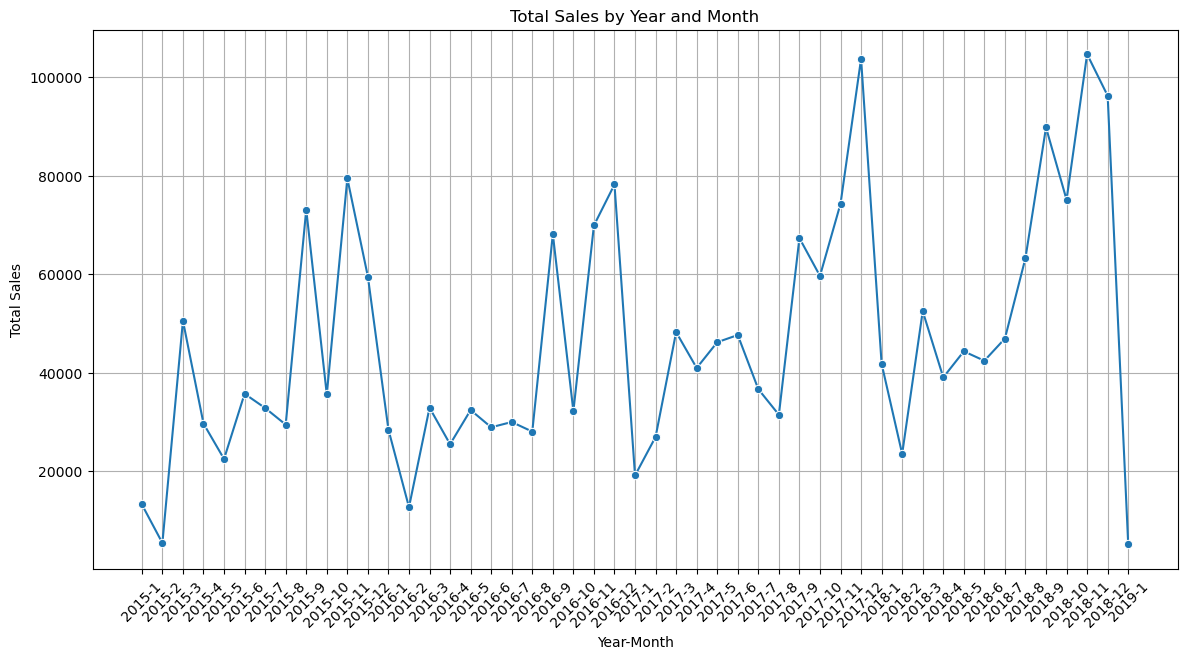

In [63]:
# Reset the index to get 'year' and 'month' as columns
sales_year_month_reset = sales_year_month.reset_index()

# Create a new column 'year_month' for plotting
sales_year_month_reset['year_month'] = sales_year_month_reset['year'].astype(str) + '-' + sales_year_month_reset['month'].astype(str)

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_year_month_reset, x='year_month', y='total_sales', marker='o')
plt.xticks(rotation=45)
plt.title('Total Sales by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

We see there is a drop on January 2019. This is the result of not having much data for that month and so on. 

In [67]:
Cate_sales = df.groupby('Category').agg(total_sales=('Sales', 'sum'), avg_sale=('Sales', 'mean'), order_count=('Order_ID', 'count'))
Cate_sales.sort_values(by='total_sales', ascending=False)

,total_sales,avg_sale,order_count
Category,,,
Technology,827455.8730,456.401474,1813
Furniture,728658.5757,350.653790,2078
Office Supplies,705422.3340,119.381001,5909


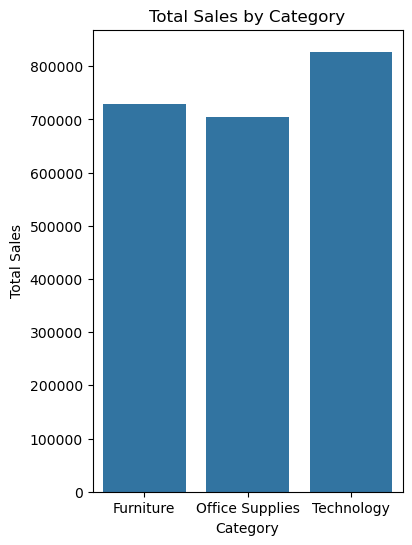

In [73]:
# Plotting the bar chart for Cate_sales
plt.figure(figsize=(4, 6))
sns.barplot(x=Cate_sales.index, y='total_sales', data=Cate_sales)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

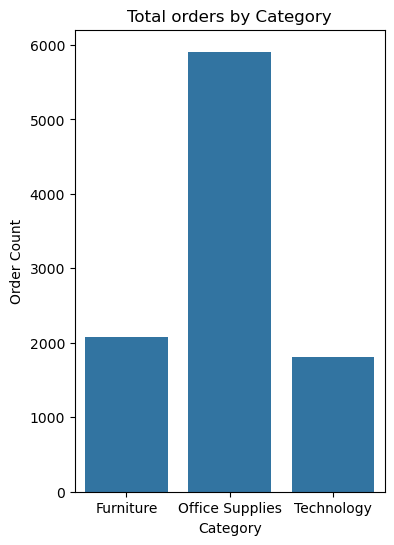

In [74]:
# Plotting the bar chart for Cate_sales
plt.figure(figsize=(4, 6))
sns.barplot(x=Cate_sales.index, y='order_count', data=Cate_sales)
plt.title('Total orders by Category')
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.show()

In [75]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,year,month
0,1,CA-2017-152156,8/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,8/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,12/6/2017,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016,10


In [76]:
#Dowloading table df to a new csv file
# df.to_csv('superstore_sales_2.csv', index=False) 